In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# 1. 데이터 불러오기 및 Minmax scaler제작

In [2]:
header = pd.read_csv('./Header.csv')
# 처음부터 다시 데이터를 만들 것인가?
New_load_DB = False

if New_load_DB:
    for _ in os.listdir('./Total_DB/'):
        DB = pd.DataFrame(np.loadtxt('./Total_DB/{}'.format(_), delimiter=';', usecols=range(168)), columns=header.columns)
        header = pd.concat((header, DB))
else:
    header = pd.DataFrame(pd.read_csv('tot_db.csv'), columns=header.columns)

## 1.1 전체 데이터를 통하여 Minmax scaler 제작

In [3]:
des = header.describe()
des

,BFV122,BHV1,BHV101,BHV108,BHV2,BHV208,BHV22,BHV3,BHV308,BHV311,...,ZSGW1,ZSGW2,ZSGW3,FSRMDPM,USUBMA,ZINST1,ZINST17,ZINST2,ZINST3,ZINST46
count,244982.000000,244982.000000,244982.0,244982.000000,244982.000000,244982.000000,244982.000000,244982.0,244982.000000,244982.000000,...,244982.000000,244982.000000,244982.000000,2.449820e+05,244982.000000,244982.000000,244982.000000,244982.000000,244982.000000,244982.000000
mean,0.026071,0.045728,0.0,0.093922,0.045728,0.093922,0.498314,0.0,0.093922,0.973101,...,6.951259,6.779299,6.441462,-2.926887e+02,24.804459,4.273166,0.597258,-8.608793,0.947179,240.628243
std,0.123582,0.207692,0.0,0.290862,0.207692,0.290862,0.499708,0.0,0.290862,0.093690,...,2.707714,2.714360,2.343627,2.772152e+04,34.091013,19.711357,0.727222,2.146046,1.384936,48.185374
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,-0.440000,-0.780000,-0.560000,-4.988283e+06,-6.730000,0.000000,0.000000,-11.000000,0.000000,51.330000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.960000,...,4.940000,4.890000,4.930000,-3.000000e-01,-0.650000,0.000000,0.000000,-11.000000,0.000000,218.582500
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,...,6.010000,6.060000,5.630000,-2.000000e-02,10.550000,0.000000,0.330000,-8.810000,0.000000,259.070000
75%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,...,8.650000,8.380000,7.550000,-0.000000e+00,39.930000,0.020000,0.890000,-7.010000,1.920000,268.380000
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,18.750000,15.600000,13.630000,5.210000e+00,200.280000,103.170000,4.390000,-3.340000,4.350000,326.200000


In [4]:
Tot_minmax = des.loc[['min', 'max']] # 전체 변수에 대한 minmax값
Tot_minmax

,BFV122,BHV1,BHV101,BHV108,BHV2,BHV208,BHV22,BHV3,BHV308,BHV311,...,ZSGW1,ZSGW2,ZSGW3,FSRMDPM,USUBMA,ZINST1,ZINST17,ZINST2,ZINST3,ZINST46
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.44,-0.78,-0.56,-4988283.00,-6.73,0.00,0.00,-11.00,0.00,51.33
max,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,18.75,15.60,13.63,5.21,200.28,103.17,4.39,-3.34,4.35,326.20


In [5]:
# MinmaxScaler를 활용한 노멀라이제이션
scaler = MinMaxScaler()
scaler.fit(Tot_minmax)
norm_db = scaler.transform(header.values)
norm_db.shape

(244982, 168)

## 1.2 제작된 Minmax scaler를 사용하여 전체 데이터 정규화 검증

In [6]:
norm_db = pd.DataFrame(norm_db, columns=header.columns)
norm_db.head()

,BFV122,BHV1,BHV101,BHV108,BHV2,BHV208,BHV22,BHV3,BHV308,BHV311,...,ZSGW1,ZSGW2,ZSGW3,FSRMDPM,USUBMA,ZINST1,ZINST17,ZINST2,ZINST3,ZINST46
0,0.58,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830891,0.943622,0.999999,0.120622,0.967045,0.0,0.998695,0.0,0.997854
1,0.57,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830891,0.943622,0.999999,0.120526,0.966754,0.0,0.998695,0.0,0.997926
2,0.58,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830281,0.942918,0.999999,0.121105,0.969759,0.0,0.998695,0.0,0.997599
3,0.58,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830281,0.942918,0.999999,0.120815,0.970243,0.0,0.998695,0.0,0.997417
4,0.58,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830281,0.943622,0.999999,0.120960,0.969177,0.0,0.998695,0.0,0.997490


# 2. 훈련용 및 검증용 데이터 작성

In [7]:
all_db_load = False

# 선택할 변수 선정
input_value = ['BHV311', 'BPSV10', 'BPSV5', 'BV102', 'BV202', 'BV302', 'KCHRGP1', 'KCHRGP3', 'KCTMTSP', 'KLAMPO121',
               'KLAMPO123', 'KLAMPO47', 'KSWO125', 'WPRZSV', 'ZSGW1', 'ZSGW2', 'ZSGW3', 'KBCDO23', 'KZBANK1', 'KZBANK2', 
               'KZBANK3', 'KZBANK4', 'KZBANK5', 'KZBANK6', 'KZBANK7', 'KZBANK8', 'QPROREL', 'QPRZB', 'QPRZP', 'UAVLEG1', 
               'UAVLEG2', 'UAVLEG3', 'UAVLEGM', 'UCOLEG1', 'UCOLEG2', 'UCOLEG3', 'UHOLEG1', 'UHOLEG2', 'UHOLEG3', 'WACCA', 
               'WACCB', 'WHV22', 'WSPRAY', 'WSPRCS1', 'WSPRCS2', 'WSTM1', 'WSTM2', 'WSTM3', 'ZINST101', 'ZINST22', 'ZINST25', 
               'ZINST26', 'ZINST42', 'ZINST56', 'ZINST57', 'ZINST58', 'ZINST62', 'ZINST65', 'ZINST66', 'ZINST70', 'ZINST71', 
               'ZINST72', 'ZINST73', 'ZINST74', 'ZINST75', 'ZINST76', 'ZINST77', 'ZINST78', 'ZINST89', 'ZINST91', 'ZINST92', 
               'ZINST93', 'ZINST94', 'ZINST95', 'ZINST96', 'ZINST99', 'ZPRZ', 'ZREAC']
output_value = ['BFV122', 'BHV1', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV614',
                'BLV615', 'BPORV', 'BPRZSP', 'BV101', 'BV201', 'BV301', 'KAFWP1', 'KAFWP2', 'KAFWP3', 'KBHON',
                'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124', 'KLAMPO125', 'KLAMPO126',
                'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO', 'KOHV22', 'KOLV615', 'KPBHM',
                 'KRXTRIP', 'KSWO120']

input_length = 10
Norm_DB_input_train_DB = []
Norm_DB_output_train_DB = []

Norm_DB_input_test_DB = []
Norm_DB_output_test_DB = []

for _ in os.listdir('./Train_DB/'):
    #단일 데이터 읽어 오기
    DB = pd.DataFrame(np.loadtxt('./Train_DB/{}'.format(_), delimiter=';', usecols=range(168)), columns=header.columns)
    Norm_DB = pd.DataFrame(scaler.transform(DB.values), columns=header.columns)

    # 데이터 분할
    Norm_DB_input = Norm_DB[input_value]
    Norm_DB_output = Norm_DB[output_value]
    
    # 출력 데이터에서 조절가능한 변수와 on/off인 변수를 분할.
    output_value_onoff = ['BHV1', 'BHV108', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV615', 'BPORV', 'KAFWP1',
                      'KAFWP2', 'KAFWP3', 'KBHON', 'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124',
                      'KLAMPO125', 'KLAMPO126', 'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO',
                      'KOHV22', 'KOLV615', 'KPBHM', 'KRXTRIP', 'KSWO120'] #35
    output_value_reg = ['BFV122', 'BLV614', 'BPRZSP', 'BV101', 'BV201', 'BV301']

    temp = pd.DataFrame()

    for _ in output_value_onoff:
        temp['{}_On'.format(_)] = Norm_DB_output[_] >= 0.5
        temp['{}_Off'.format(_)] = Norm_DB_output[_] <= 0.5

    mappint_word = {
        True: 1,
        False: 0
    }
    for _ in temp.columns:
        temp[_] = temp[_].map(mappint_word)

    for _ in output_value_reg:
        temp[_] = Norm_DB_output[_]
    
    Norm_DB_output = temp
    print(Norm_DB_output.shape)
    # 10개 시간 스텝으로 분할하여 저장
    for i in range(0, Norm_DB_input.shape[0] - input_length -1):
        # input DB
        Seqence_data = Norm_DB_input.iloc[i : i + input_length].values
        Norm_DB_input_train_DB.append(Seqence_data)
        # output DB
        Seqence_data = Norm_DB_output.iloc[i + input_length + 1].values
        Norm_DB_output_train_DB.append(Seqence_data)
        
    # 테스트용 break
    if not all_db_load:
        print('단일 데이터만 읽었습니다.')
        break
        
for _ in os.listdir('./Test_DB/'):
    #단일 데이터 읽어 오기
    DB = pd.DataFrame(np.loadtxt('./Test_DB/{}'.format(_), delimiter=';', usecols=range(168)), columns=header.columns)
    Norm_DB = pd.DataFrame(scaler.transform(DB.values), columns=header.columns)

    # 데이터 분할
    Norm_DB_input = Norm_DB[input_value]
    Norm_DB_output = Norm_DB[output_value]
    
    
    # 출력 데이터에서 조절가능한 변수와 on/off인 변수를 분할.
    output_value_onoff = ['BHV1', 'BHV108', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV615', 'BPORV', 'KAFWP1',
                      'KAFWP2', 'KAFWP3', 'KBHON', 'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124',
                      'KLAMPO125', 'KLAMPO126', 'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO',
                      'KOHV22', 'KOLV615', 'KPBHM', 'KRXTRIP', 'KSWO120'] #35
    output_value_reg = ['BFV122', 'BLV614', 'BPRZSP', 'BV101', 'BV201', 'BV301']

    temp = pd.DataFrame()

    for _ in output_value_onoff:
        temp['{}_On'.format(_)] = Norm_DB_output[_] >= 0.5
        temp['{}_Off'.format(_)] = Norm_DB_output[_] <= 0.5

    mappint_word = {
        True: 1,
        False: 0
    }
    for _ in temp.columns:
        temp[_] = temp[_].map(mappint_word)

    for _ in output_value_reg:
        temp[_] = Norm_DB_output[_]
    
    Norm_DB_output = temp
    print(Norm_DB_output.shape)
    
    # 10개 시간 스텝으로 분할하여 저장
    for i in range(0, Norm_DB_input.shape[0] - input_length -1):
        # input DB
        Seqence_data = Norm_DB_input.iloc[i : i + input_length].values
        Norm_DB_input_test_DB.append(Seqence_data)
        # output DB
        Seqence_data = Norm_DB_output.iloc[i + input_length + 1].values
        Norm_DB_output_test_DB.append(Seqence_data)
        
    # 테스트용 break
    if not all_db_load:
        print('단일 데이터만 읽었습니다.')
        break

(2074, 74)
단일 데이터만 읽었습니다.
(865, 74)
단일 데이터만 읽었습니다.


# 3. 네트워크 훈련 및 구축

## 3.1 On/off 변수를 처리하는 네트워크(on/off network) 구축

In [8]:
import tensorflow as tf
import numpy as np

Shape_trina_DB = np.shape(Norm_DB_input_train_DB) # (None, 10, 78)

# 1 on/off 분류 모델
input_layer = tf.keras.Input(batch_shape=(None, Shape_trina_DB[1], Shape_trina_DB[2]))
L_model = tf.keras.models.Sequential([
    tf.keras.layers.CuDNNLSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.CuDNNLSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dropout(0.3)
])

model = L_model(input_layer)

out_layer = []
# on/off 변수 출력 레이어
for i in range(0,35):
    out_layer.append(tf.keras.layers.Dense(2, activation='softmax')(model))

fin_model = tf.keras.Model(inputs=input_layer, outputs=out_layer)

fin_model.summary()

fin_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10, 78)       0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 32)           72224       input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 2)            66          sequential[0][0]                 
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            66          sequential[0][0]                 
__________________________________________________________________________________________________
dense_3 (D

## 3.2 조절이 필요한 변수를 처리하는 네트워크(reg network) 구축

In [9]:
# 2 변동성 벨브의 모델
input_layer = tf.keras.Input(batch_shape=(None, Shape_trina_DB[1], Shape_trina_DB[2]))
L_model = tf.keras.models.Sequential([
    tf.keras.layers.CuDNNLSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.CuDNNLSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dropout(0.3)
])

model = L_model(input_layer)

out_layer = []
# on/off 변수 출력 레이어
for i in range(0,1):
    out_layer.append(tf.keras.layers.Dense(6)(model))

fin_model_2 = tf.keras.Model(inputs=input_layer, outputs=out_layer)

fin_model_2.summary()

fin_model_2.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 10, 78)            0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 32)                72224     
_________________________________________________________________
dense_37 (Dense)             (None, 6)                 198       
Total params: 72,422
Trainable params: 72,422
Non-trainable params: 0
_________________________________________________________________


## 3.3 개별적 네트워크에 사용하도록 훈련용 데이터 재구축 및 분할

In [10]:
Norm_DB_output_train_DB = pd.DataFrame(Norm_DB_output_train_DB, columns=temp.columns)
Norm_DB_output_train_DB.head()

,BHV1_On,BHV1_Off,BHV108_On,BHV108_Off,BHV2_On,BHV2_Off,BHV208_On,BHV208_Off,BHV22_On,BHV22_Off,...,KRXTRIP_On,KRXTRIP_Off,KSWO120_On,KSWO120_Off,BFV122,BLV614,BPRZSP,BV101,BV201,BV301
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.57,0.956044,0.21,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.57,0.945055,0.20,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.57,0.945055,0.18,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.57,0.945055,0.17,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.57,0.934066,0.15,0.0,0.0,0.0


In [11]:
## On/off 변수의 출력 output 작성
on_off_value = []

output_value_onoff = ['BHV1', 'BHV108', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV615', 'BPORV', 'KAFWP1',
                      'KAFWP2', 'KAFWP3', 'KBHON', 'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124',
                      'KLAMPO125', 'KLAMPO126', 'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO',
                      'KOHV22', 'KOLV615', 'KPBHM', 'KRXTRIP', 'KSWO120'] #35
    
for _ in output_value_onoff:
    on_off_value.append(Norm_DB_output_train_DB[['{}_On'.format(_),'{}_Off'.format(_)]].values)
np.shape(on_off_value)

(35, 2063, 2)

In [12]:
## 변동성 변수의 출력 output 작성
output_value_reg = ['BFV122', 'BLV614', 'BPRZSP', 'BV101', 'BV201', 'BV301']

reg_value = Norm_DB_output_train_DB[['BFV122', 'BLV614', 'BPRZSP', 'BV101', 'BV201', 'BV301']].values
np.shape(reg_value)

(2063, 6)

## 3.4 네트워크 훈련

In [13]:
hist = fin_model.fit([Norm_DB_input_train_DB], on_off_value, epochs=10, batch_size=100)
hist2 = fin_model_2.fit([Norm_DB_input_train_DB], [reg_value], epochs=10, batch_size=100)

Epoch 1/10
2063/2063 [==============================] - 12s 6ms/step - loss: 17.8824 - dense_1_loss: 0.3358 - dense_2_loss: 0.4748 - dense_3_loss: 0.7215 - dense_4_loss: 0.3730 - dense_5_loss: 0.6251 - dense_6_loss: 0.8381 - dense_7_loss: 0.4192 - dense_8_loss: 0.7347 - dense_9_loss: 0.3620 - dense_10_loss: 0.6331 - dense_11_loss: 0.5011 - dense_12_loss: 0.4846 - dense_13_loss: 0.5217 - dense_14_loss: 0.4970 - dense_15_loss: 0.5020 - dense_16_loss: 0.4980 - dense_17_loss: 0.2634 - dense_18_loss: 0.1960 - dense_19_loss: 0.4813 - dense_20_loss: 0.5100 - dense_21_loss: 0.4567 - dense_22_loss: 0.7272 - dense_23_loss: 0.7581 - dense_24_loss: 0.7012 - dense_25_loss: 0.9404 - dense_26_loss: 0.3114 - dense_27_loss: 0.3710 - dense_28_loss: 0.8797 - dense_29_loss: 0.2986 - dense_30_loss: 0.4315 - dense_31_loss: 0.2767 - dense_32_loss: 0.3552 - dense_33_loss: 0.5480 - dense_34_loss: 0.3433 - dense_35_loss: 0.5111 - dense_1_acc: 0.8924 - dense_2_acc: 0.8042 - dense_3_acc: 0.5075 - dense_4_acc: 0.8

2063/2063 [==============================] - 1s 551us/step - loss: 2.8816 - dense_1_loss: 0.0322 - dense_2_loss: 0.0392 - dense_3_loss: 0.0631 - dense_4_loss: 0.0226 - dense_5_loss: 0.0555 - dense_6_loss: 0.0574 - dense_7_loss: 0.0605 - dense_8_loss: 0.2456 - dense_9_loss: 0.0171 - dense_10_loss: 0.0647 - dense_11_loss: 0.2669 - dense_12_loss: 0.0195 - dense_13_loss: 0.0316 - dense_14_loss: 0.0453 - dense_15_loss: 0.1465 - dense_16_loss: 0.0197 - dense_17_loss: 0.0154 - dense_18_loss: 0.0159 - dense_19_loss: 0.0216 - dense_20_loss: 0.0324 - dense_21_loss: 0.2113 - dense_22_loss: 0.1841 - dense_23_loss: 0.4480 - dense_24_loss: 0.1891 - dense_25_loss: 0.0629 - dense_26_loss: 0.0170 - dense_27_loss: 0.0398 - dense_28_loss: 0.0516 - dense_29_loss: 0.0308 - dense_30_loss: 0.0527 - dense_31_loss: 0.0106 - dense_32_loss: 0.0212 - dense_33_loss: 0.1200 - dense_34_loss: 0.0440 - dense_35_loss: 0.1258 - dense_1_acc: 0.9927 - dense_2_acc: 0.9864 - dense_3_acc: 0.9816 - dense_4_acc: 0.9942 - dense

2063/2063 [==============================] - 1s 509us/step - loss: 1.5682 - dense_1_loss: 0.0158 - dense_2_loss: 0.0257 - dense_3_loss: 0.0327 - dense_4_loss: 0.0093 - dense_5_loss: 0.0257 - dense_6_loss: 0.0215 - dense_7_loss: 0.0388 - dense_8_loss: 0.1223 - dense_9_loss: 0.0118 - dense_10_loss: 0.0238 - dense_11_loss: 0.1893 - dense_12_loss: 0.0101 - dense_13_loss: 0.0263 - dense_14_loss: 0.0169 - dense_15_loss: 0.0940 - dense_16_loss: 0.0101 - dense_17_loss: 0.0056 - dense_18_loss: 0.0067 - dense_19_loss: 0.0108 - dense_20_loss: 0.0155 - dense_21_loss: 0.1516 - dense_22_loss: 0.1054 - dense_23_loss: 0.2292 - dense_24_loss: 0.0947 - dense_25_loss: 0.0200 - dense_26_loss: 0.0077 - dense_27_loss: 0.0240 - dense_28_loss: 0.0135 - dense_29_loss: 0.0130 - dense_30_loss: 0.0269 - dense_31_loss: 0.0055 - dense_32_loss: 0.0083 - dense_33_loss: 0.0676 - dense_34_loss: 0.0203 - dense_35_loss: 0.0678 - dense_1_acc: 0.9961 - dense_2_acc: 0.9903 - dense_3_acc: 0.9889 - dense_4_acc: 0.9981 - dense

# 4. 네트워크 검증

## 4.1 검증용 데이터를 네트워크에 입력

In [14]:
out_on_off = fin_model.predict([Norm_DB_input_test_DB])
out_reg = fin_model_2.predict([Norm_DB_input_test_DB])

## 4.2 검증용 데이터의 결과값을 재구축

In [15]:
## On/off 변수의 출력 output 복구
on_off_value = pd.DataFrame()

output_value_onoff = ['BHV1', 'BHV108', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV615', 'BPORV', 'KAFWP1',
                      'KAFWP2', 'KAFWP3', 'KBHON', 'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124',
                      'KLAMPO125', 'KLAMPO126', 'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO',
                      'KOHV22', 'KOLV615', 'KPBHM', 'KRXTRIP', 'KSWO120'] #35
    
for _ in range(0, len(output_value_onoff)):
    val = output_value_onoff[_]
    temp_value_box = pd.DataFrame(out_on_off[_], columns=['{}_On'.format(val),'{}_Off'.format(val)])
    
    on_off_value['{}_On'.format(val)] = temp_value_box['{}_On'.format(val)]
    on_off_value['{}_Off'.format(val)] = temp_value_box['{}_Off'.format(val)]
    
## 변동성 변수의 출력값 복구
output_value_reg = ['BFV122', 'BLV614', 'BPRZSP', 'BV101', 'BV201', 'BV301']
reg_value = pd.DataFrame(out_reg, columns=output_value_reg)

## 2개 프레임 합치기
out_total = on_off_value
for _ in output_value_reg:
    out_total[_] = reg_value[_]

- on_off 변수에 대한 분류 네트워크의 결과값과 reg 변수에 대한 네트워크의 결과값

In [22]:
out_total.head(20)

,BHV1_On,BHV1_Off,BHV108_On,BHV108_Off,BHV2_On,BHV2_Off,BHV208_On,BHV208_Off,BHV22_On,BHV22_Off,...,KRXTRIP_On,KRXTRIP_Off,KSWO120_On,KSWO120_Off,BFV122,BLV614,BPRZSP,BV101,BV201,BV301
0,0.996639,0.003361,0.991691,0.008309,0.996170,0.003830,0.997384,0.002616,0.015753,0.984247,...,0.005607,0.994393,0.028423,0.971577,0.395270,0.759739,0.015491,-0.054245,-0.035562,-0.072308
1,0.996668,0.003332,0.991694,0.008306,0.996189,0.003811,0.997385,0.002615,0.015704,0.984296,...,0.005549,0.994451,0.028464,0.971536,0.395470,0.758676,0.015582,-0.054181,-0.035476,-0.072550
2,0.996677,0.003323,0.991696,0.008304,0.996194,0.003806,0.997384,0.002616,0.015682,0.984318,...,0.005534,0.994466,0.028502,0.971498,0.395114,0.758152,0.015425,-0.053703,-0.035064,-0.072494
3,0.996675,0.003325,0.991698,0.008302,0.996192,0.003808,0.997382,0.002618,0.015676,0.984324,...,0.005542,0.994458,0.028534,0.971466,0.394497,0.757931,0.015105,-0.052937,-0.034413,-0.072247
4,0.996671,0.003329,0.991700,0.008300,0.996189,0.003811,0.997381,0.002619,0.015673,0.984327,...,0.005556,0.994444,0.028563,0.971437,0.393817,0.757817,0.014760,-0.052118,-0.033726,-0.071932
5,0.996666,0.003334,0.991702,0.008298,0.996184,0.003816,0.997379,0.002621,0.015671,0.984329,...,0.005572,0.994428,0.028594,0.971406,0.393122,0.757762,0.014412,-0.051273,-0.033014,-0.071557
6,0.996660,0.003340,0.991705,0.008295,0.996178,0.003822,0.997377,0.002623,0.015672,0.984328,...,0.005591,0.994409,0.028623,0.971377,0.392433,0.757750,0.014085,-0.050457,-0.032339,-0.071174
7,0.996653,0.003347,0.991707,0.008293,0.996173,0.003827,0.997375,0.002625,0.015673,0.984327,...,0.005611,0.994389,0.028651,0.971349,0.391783,0.757748,0.013775,-0.049676,-0.031695,-0.070800
8,0.996646,0.003354,0.991709,0.008291,0.996167,0.003833,0.997373,0.002627,0.015675,0.984325,...,0.005630,0.994370,0.028679,0.971321,0.391183,0.757780,0.013484,-0.048933,-0.031074,-0.070428
9,0.996639,0.003361,0.991711,0.008289,0.996162,0.003838,0.997372,0.002628,0.015678,0.984322,...,0.005649,0.994351,0.028706,0.971294,0.390626,0.757827,0.013212,-0.048244,-0.030494,-0.070074


- 실제 검증용 데이터의 on_off 및 reg 변수

In [23]:
Norm_DB_output_test_DB = pd.DataFrame(Norm_DB_output_test_DB, columns=temp.columns)
Norm_DB_output_test_DB.head(20)

,BHV1_On,BHV1_Off,BHV108_On,BHV108_Off,BHV2_On,BHV2_Off,BHV208_On,BHV208_Off,BHV22_On,BHV22_Off,...,KRXTRIP_On,KRXTRIP_Off,KSWO120_On,KSWO120_Off,BFV122,BLV614,BPRZSP,BV101,BV201,BV301
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.57,0.945055,0.18,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.57,0.945055,0.17,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.57,0.934066,0.16,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.56,0.934066,0.14,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.56,0.934066,0.13,0.0,0.0,0.0
5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.56,0.923077,0.12,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.56,0.923077,0.11,0.0,0.0,0.0
7,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.56,0.912088,0.10,0.0,0.0,0.0
8,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.56,0.912088,0.10,0.0,0.0,0.0
9,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.56,0.901099,0.09,0.0,0.0,0.0


## 4.3 그래프로 도식화

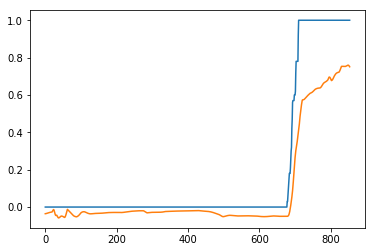

In [24]:
plt.plot(Norm_DB_output_test_DB['BV201'])
plt.plot(out_total['BV201'])
plt.show()